In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
file_path = "winequality-red.csv"
dataset = pd.read_csv(file_path, delimiter=';')

In [39]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


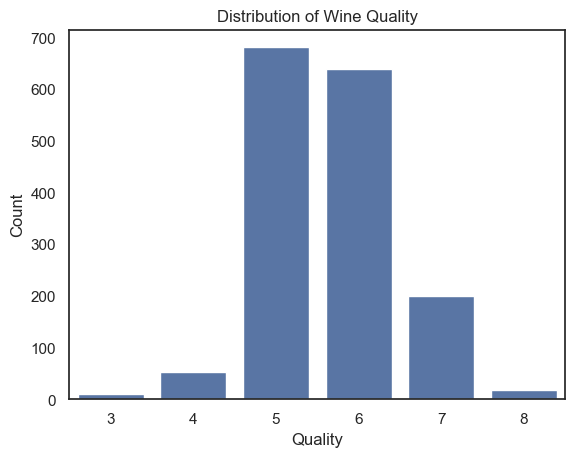

In [40]:
sns.countplot(x='quality', data=dataset, order=sorted(dataset['quality'].unique()))
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

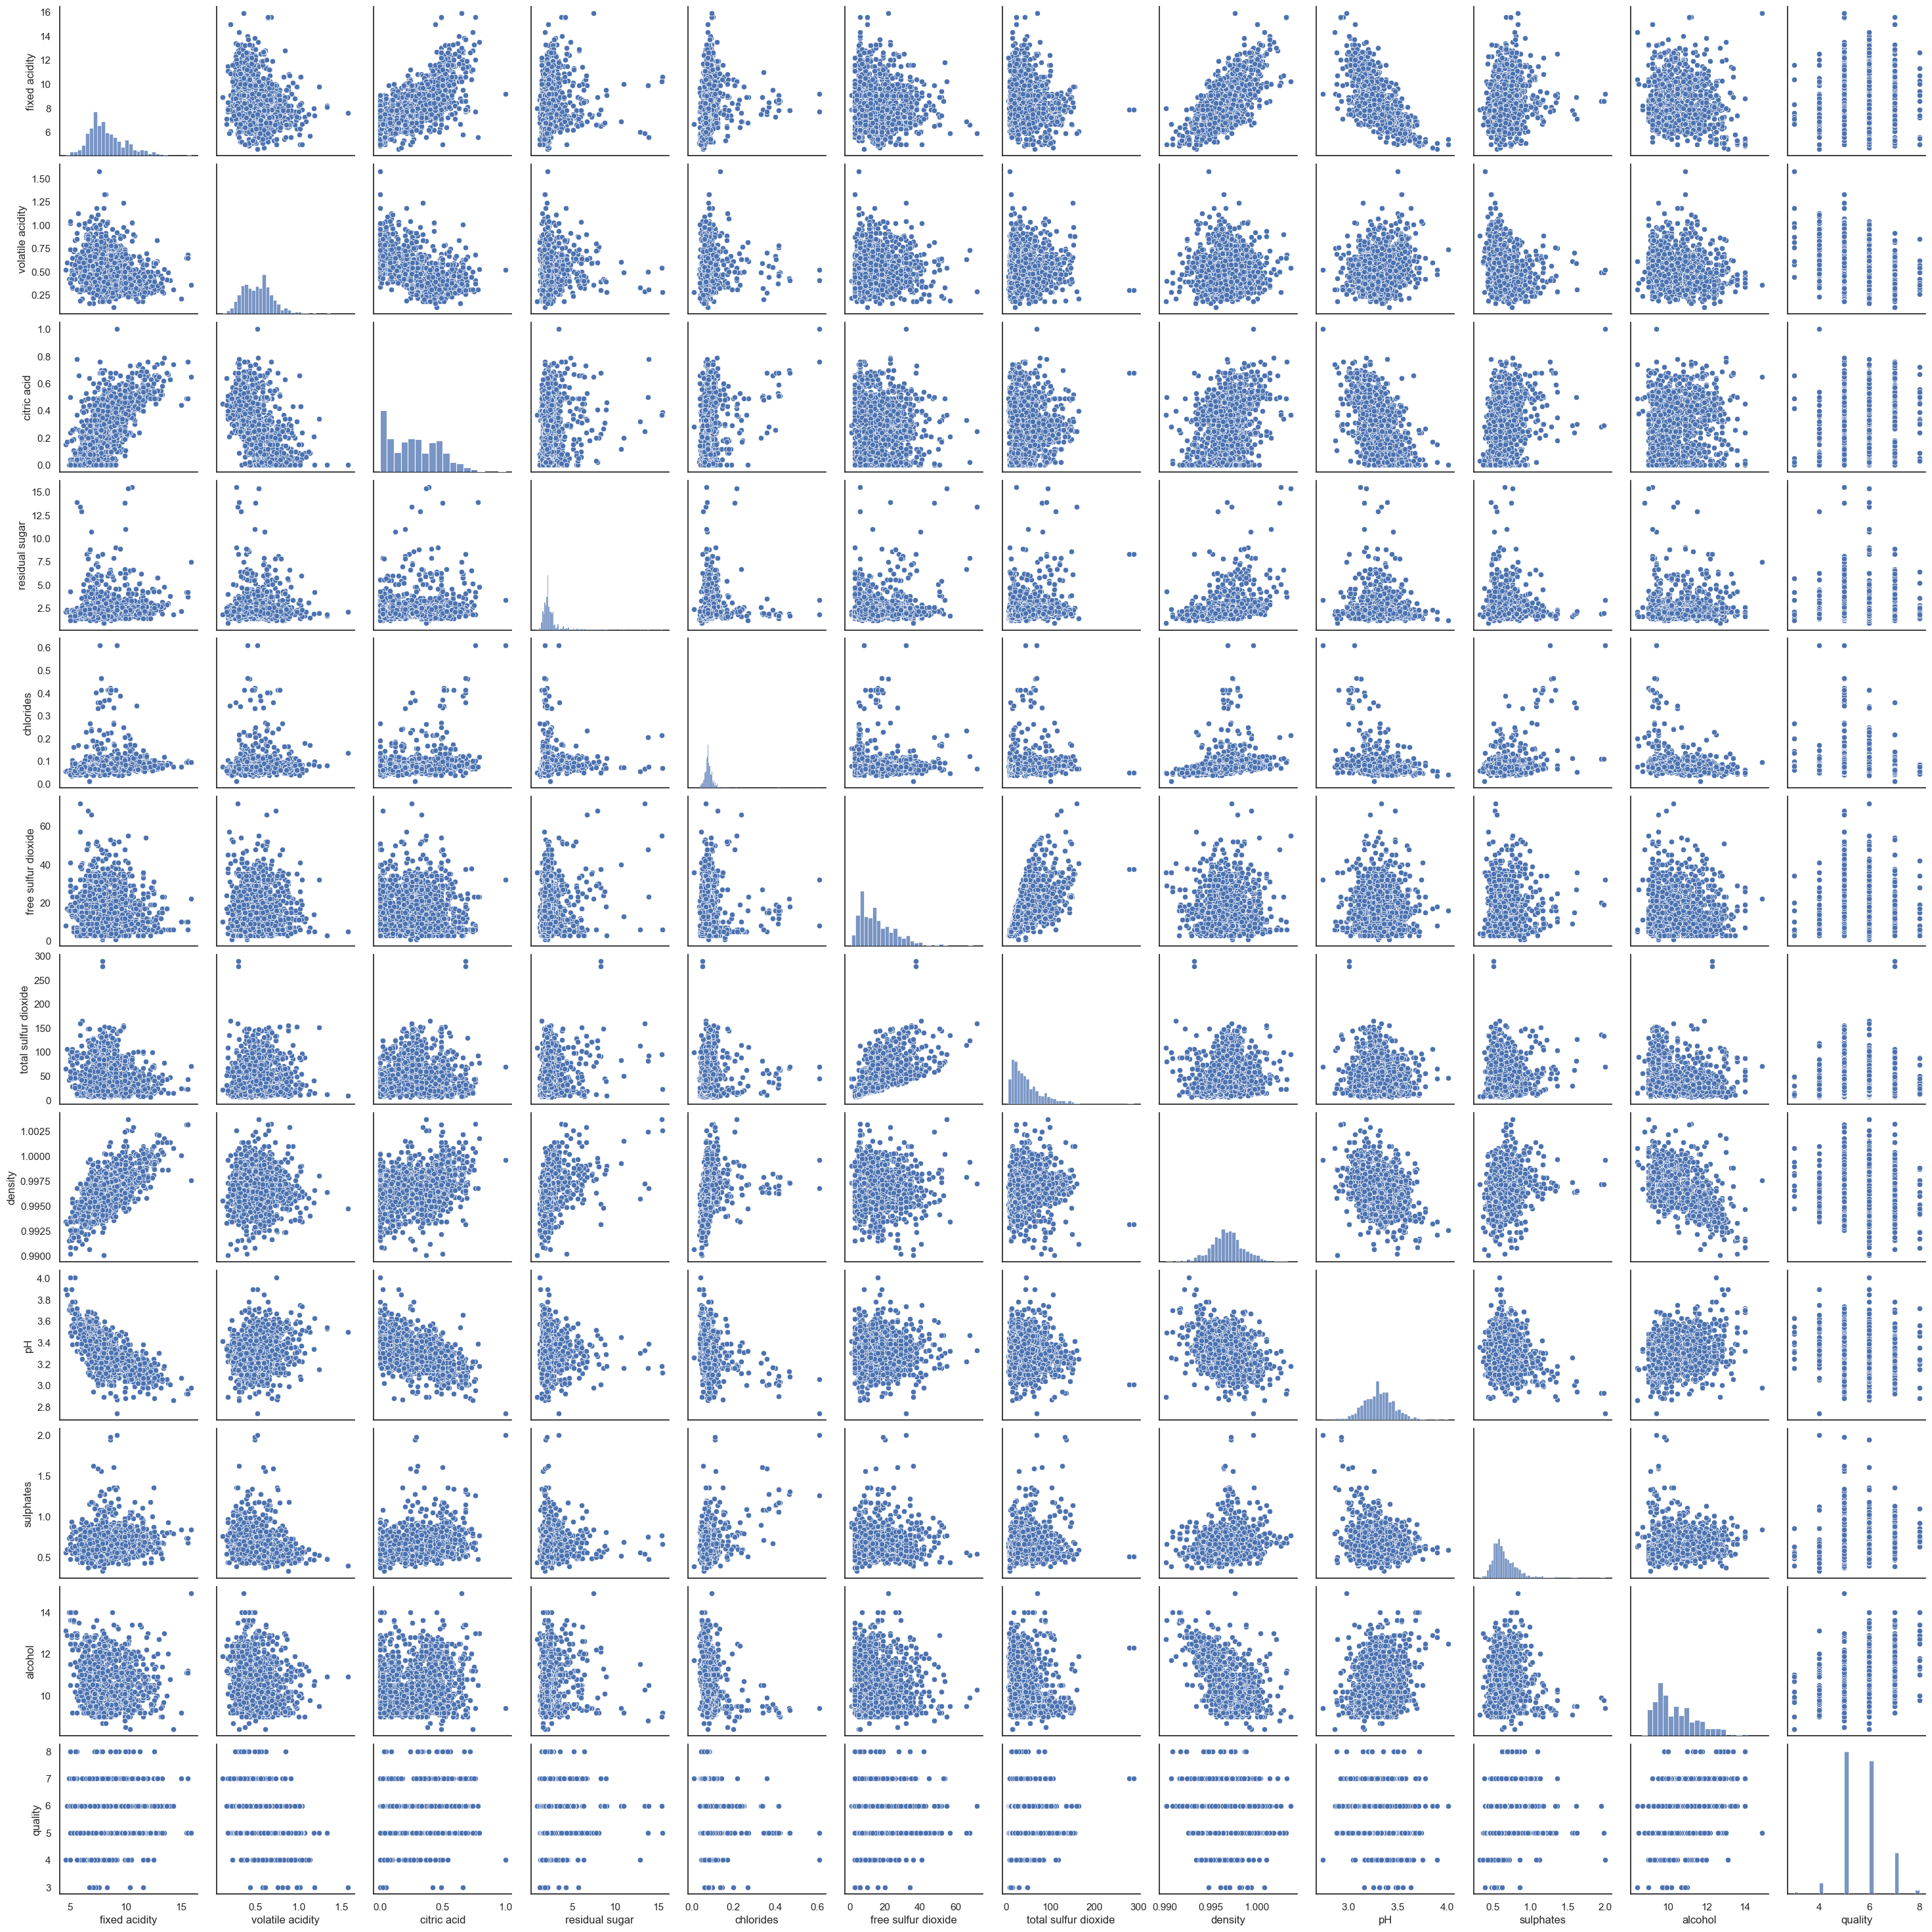

In [41]:
sns.pairplot(dataset)

In [42]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [43]:
dataset.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<Axes: title={'center': 'Correlation with quality'}>

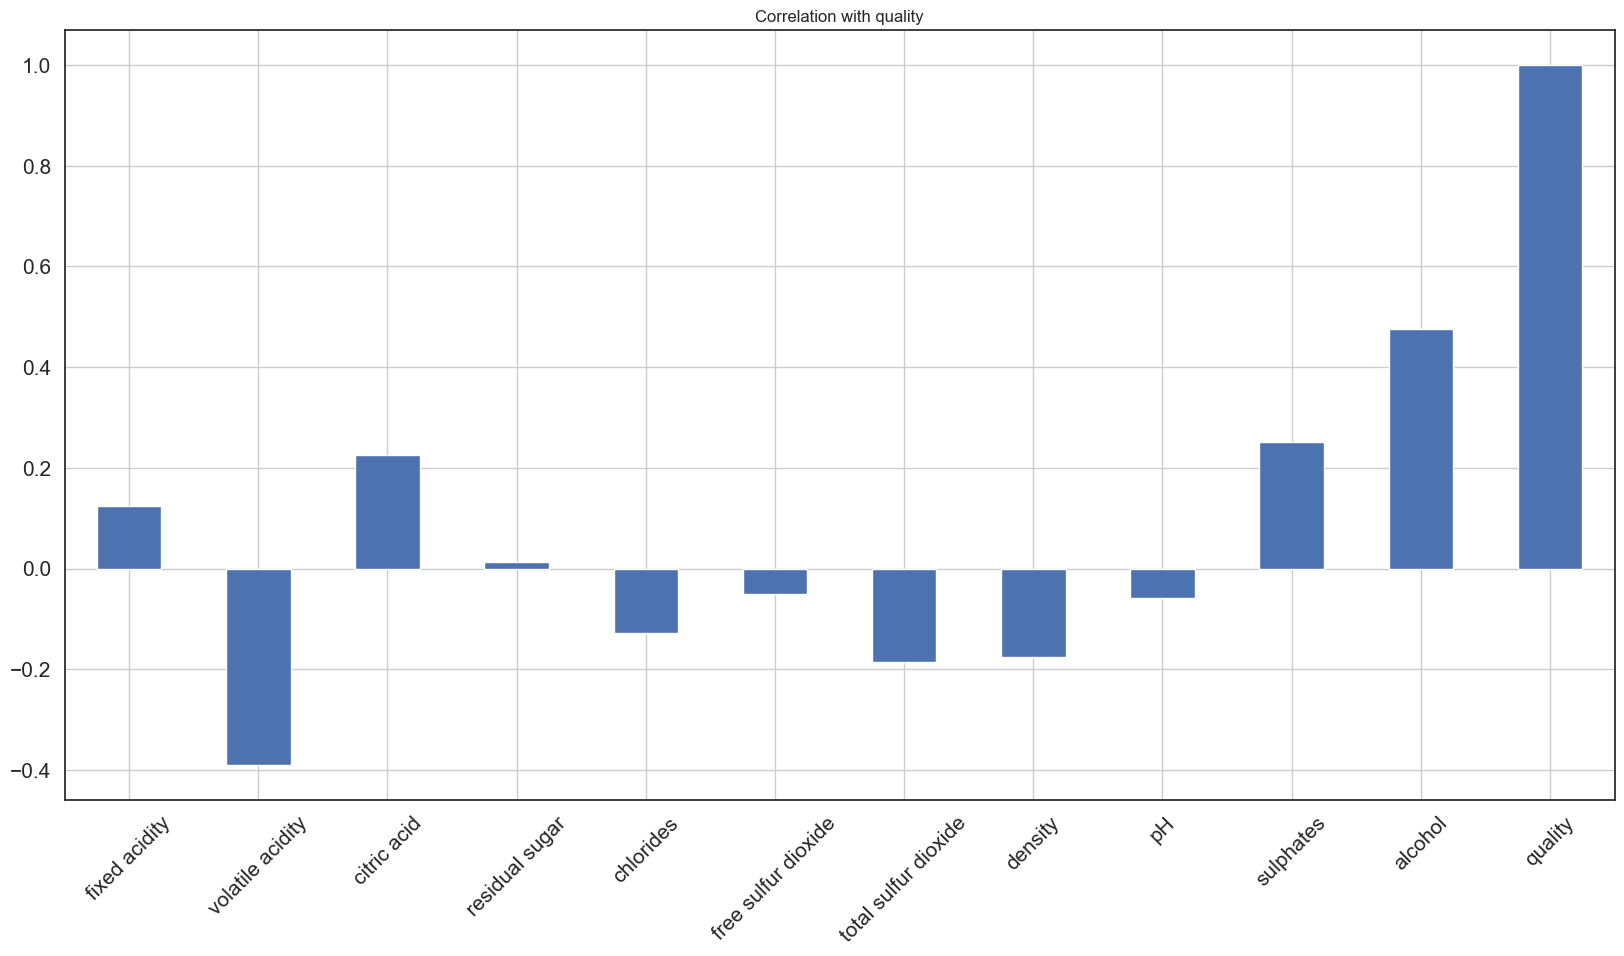

In [44]:
dataset.corrwith(dataset.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [45]:
sns.set(style="white")
corr = dataset.corr()

In [46]:
X = dataset.drop('quality',axis=1)
y=dataset['quality']

In [47]:
features_label = dataset.columns[:11]

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) fixed acidity                  0.154052
 2) volatile acidity               0.116418
 3) citric acid                    0.107016
 4) residual sugar                 0.099913
 5) chlorides                      0.089030
 6) free sulfur dioxide            0.080517
 7) total sulfur dioxide           0.077752
 8) density                        0.072258
 9) pH                             0.071140
10) sulphates                      0.067320
11) alcohol                        0.064583


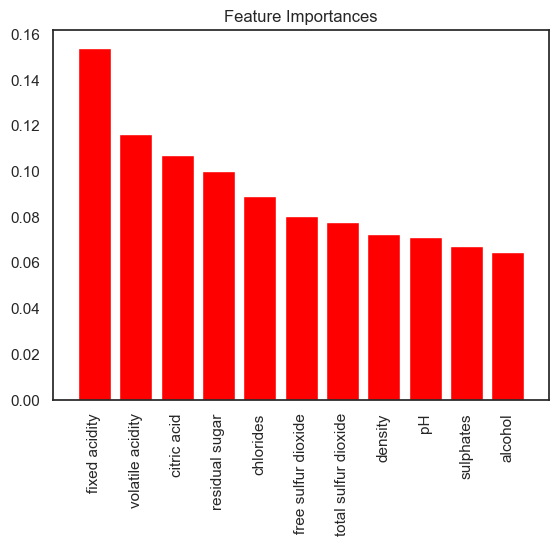

In [49]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="red", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [50]:
dataset['quality_binary'] = dataset['quality'].apply(lambda x: 1 if 7 <= x <= 8 else 0)
X = dataset.drop(['quality', 'quality_binary'], axis=1)
y = dataset['quality_binary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (Binarized)', acc, prec, rec, f1]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(model_results)


                       Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Binarized)   0.90625   0.833333  0.434783  0.571429


In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

grid_search_precision = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='precision', cv=10, n_jobs=-1)
grid_search_precision.fit(X_train, y_train)

rf_best_precision = grid_search_precision.best_score_

grid_search_recall = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='recall', cv=10, n_jobs=-1)
grid_search_recall.fit(X_train, y_train)

rf_best_recall = grid_search_recall.best_score_

grid_search_f1 = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='f1', cv=10, n_jobs=-1)
grid_search_f1.fit(X_train, y_train)

rf_best_f1 = grid_search_f1.best_score_

print(f"Best Accuracy: {rf_best_accuracy}")
print(f"Best Precision: {rf_best_precision}")
print(f"Best Recall: {rf_best_recall}")
print(f"Best F1: {rf_best_f1}")
print(f"Best Parameters: {rf_best_parameters}")


Best Accuracy: 0.9108821358267717
Best Precision: 0.7776515151515152
Best Recall: 0.49640522875816995
Best F1: 0.5906173879266204
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = dataset.drop('quality_binary', axis=1)
y = dataset['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear', random_state=0)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}")


Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


In [53]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = dataset.drop('quality_binary', axis=1)
y = dataset['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

model = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, random_state=0, verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}")


Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = dataset.drop('quality_binary', axis=1)
y = dataset['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}")


Accuracy: 0.971875, Precision: 1.0, Recall: 0.8043478260869565, F1 Score: 0.891566265060241


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = dataset.drop('quality_binary', axis=1)
y = dataset['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = (model.predict(X_test) > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}")


Epoch 1/10


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7773 - loss: 0.5818 
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8550 - loss: 0.4530 
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8649 - loss: 0.3798 
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8705 - loss: 0.3634 
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8477 - loss: 0.4003 
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8748 - loss: 0.3478 
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8779 - loss: 0.3344 
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8760 - loss: 0.3229 
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8739 - loss: 0.3221 
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8659 - loss: 0.3212 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.85625, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
